In [23]:
import random
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [24]:
X_train=pd.read_csv('D:\AI&ML\DL-Full-Projects\exp\Datasets\Preprocessed\X_train.csv')
X_test=pd.read_csv('D:\AI&ML\DL-Full-Projects\exp\Datasets\Preprocessed\X_test.csv')
y_train=pd.read_csv('D:\AI&ML\DL-Full-Projects\exp\Datasets\Preprocessed\y_train.csv')
y_test=pd.read_csv('D:\AI&ML\DL-Full-Projects\exp\Datasets\Preprocessed\y_test.csv')

In [25]:
y_train.value_counts()

fetal_health
1.0             1316
2.0              234
3.0              140
Name: count, dtype: int64

In [26]:
y_test['fetal_health']=y_test['fetal_health'].map({3.0:0,2.0:2,1.0:1})
y_train['fetal_health']=y_train['fetal_health'].map({3.0:0,2.0:2,1.0:1})

In [27]:
y_test['fetal_health']=y_test['fetal_health'].replace({2:0})
y_train['fetal_health']=y_train['fetal_health'].replace({2:0})

In [28]:
y_train.value_counts()

fetal_health
1               1316
0                374
Name: count, dtype: int64

In [29]:


y_train = y_train['fetal_health'].values
y_test  = y_test['fetal_health'].values

In [30]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
X_train=X_train.values
X_test=X_test.values


In [32]:
X_test

array([[ 0.49150105, -1.00397805, -1.52718459, ...,  0.27332187,
         0.21423866, -0.52004486],
       [ 0.08468173, -1.00397805,  0.90887563, ..., -0.95993042,
        -0.78843275,  1.5302728 ],
       [ 1.91029373, -1.00397805, -0.8019628 , ...,  1.7162266 ,
         1.66513212, -1.05859325],
       ...,
       [-0.52737305,  1.17501208, -0.44648153, ..., -0.00634123,
        -0.14251188, -0.52004486],
       [ 0.99896818,  1.17501208, -1.52718459, ...,  0.80208918,
         0.67244948, -0.52004486],
       [-0.32312758,  1.41519061,  2.18926403, ...,  0.27332187,
         0.67244948,  1.79842886]])

In [33]:
X_train

array([[-0.11909671, -0.45680154,  0.24470251, ..., -0.39044692,
        -0.14251188,  1.15915096],
       [-0.52737305,  1.30300458, -0.44648153, ..., -0.56893145,
        -0.21073935,  1.50443665],
       [-0.32312758, -1.00397805,  1.23393001, ..., -0.56893145,
        -0.60213123, -1.05859325],
       ...,
       [-1.14114266, -1.00397805, -0.0970957 , ..., -0.56893145,
        -0.78843275, -0.64565403],
       [ 0.99896818,  0.63412215,  0.24470251, ...,  0.96126722,
         0.99311285,  1.10120963],
       [ 0.49150105,  2.00490219,  0.24470251, ...,  1.6294268 ,
         1.75172269,  1.72576818]])

In [34]:

print('train  shape' ,X_train.shape)
print('Train Y shape' ,y_train.shape)
print('Test  shape' ,X_test.shape)
print('Test Y shape' ,y_test.shape)


train  shape (1690, 16)
Train Y shape (1690,)
Test  shape (423, 16)
Test Y shape (423,)


In [35]:
from sklearn.utils.class_weight import compute_class_weight
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight = dict(enumerate(class_weights_array))

print("Class weights:", class_weight)


Class weights: {0: 2.2593582887700534, 1: 0.64209726443769}


In [36]:
y_train[:10] 


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [37]:
X_train.shape[1]

16

In [38]:
y_train[:10] 

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers

model1 = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(0.4),
    Dense(16, kernel_regularizer=regularizers.l2(0.04)),
    Activation('relu'),

    Dense(6),
    Activation('relu'),

    Dense(1, activation='sigmoid')
])


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [41]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181 (4.61 KB)

 Trainable params: 1,181 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    class_weight=class_weight   
)


Epoch 1/25


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3921 - loss: 1.6822 - val_accuracy: 0.6809 - val_loss: 1.4090
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6613 - loss: 1.2885 - val_accuracy: 0.7967 - val_loss: 1.1226
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7639 - loss: 1.0490 - val_accuracy: 0.8298 - val_loss: 0.9073
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8448 - loss: 0.8255 - val_accuracy: 0.8369 - val_loss: 0.7547
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8577 - loss: 0.6890 - val_accuracy: 0.8652 - val_loss: 0.6384
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8823 - loss: 0.5734 - val_accuracy: 0.8913 - val_loss: 0.5376
Epoch 7/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - loss: 0.5205 - val_accuracy: 0.8700 - val_loss: 0.5166
Epoch 8/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8849 - loss: 0.4787 - val_accuracy: 0.8818 - val_loss: 0.4734


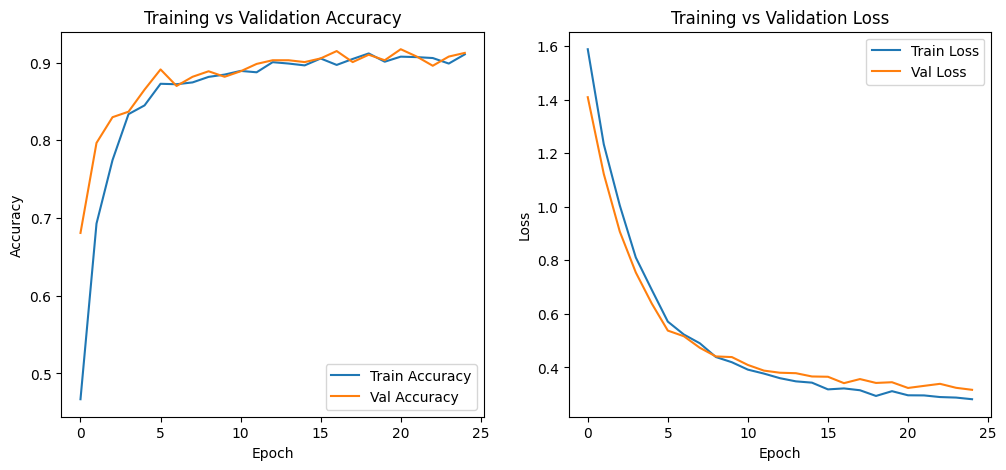

In [43]:
import matplotlib.pyplot as plt


# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()
